In [1]:
import pandas as pd

df = pd.read_csv("data/job_title_des.csv")
df.head()

,Unnamed: 0,Job Title,Job Description
0,0,Flutter Developer,We are looking for hire experts flutter develo...
1,1,Django Developer,PYTHON/DJANGO (Developer/Lead) - Job Code(PDJ ...
2,2,Machine Learning,"Data Scientist (Contractor)\n\nBangalore, IN\n..."
3,3,iOS Developer,JOB DESCRIPTION:\n\nStrong framework outside o...
4,4,Full Stack Developer,job responsibility full stack engineer – react...


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       2277 non-null   int64 
 1   Job Title        2277 non-null   object
 2   Job Description  2277 non-null   object
dtypes: int64(1), object(2)
memory usage: 53.5+ KB


In [3]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [4]:
df.isnull().sum()

Job Title          0
Job Description    0
dtype: int64

In [5]:
df['Job Title'].value_counts()

Job Title
JavaScript Developer      166
Java Developer            161
Software Engineer         160
Node js developer         160
iOS Developer             159
PHP Developer             156
Flutter Developer         155
DevOps Engineer           155
Django Developer          152
Machine Learning          152
Backend Developer         147
Network Administrator     145
Database Administrator    139
Full Stack Developer      138
Wordpress Developer       132
Name: count, dtype: int64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns



In [7]:
top_jobs = df['Job Title'].value_counts().nlargest(10).index

top_jobs_df = df[df['Job Title'].isin(top_jobs)]


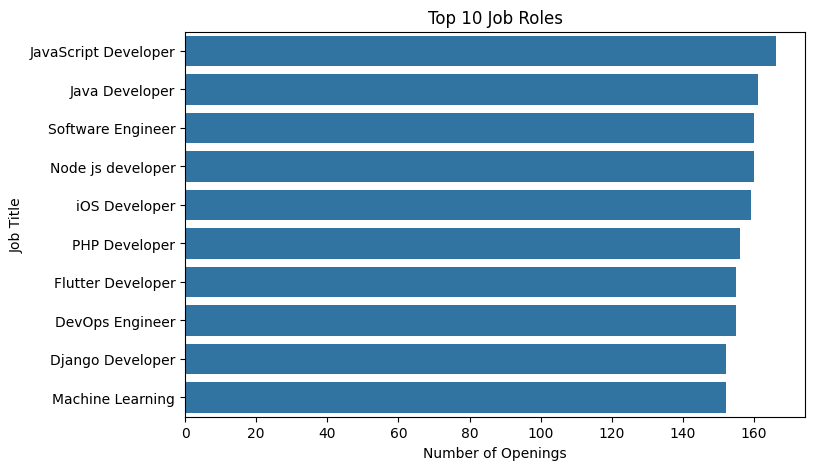

In [8]:

plt.figure(figsize=(8,5))
sns.countplot(y='Job Title', data=top_jobs_df, order=top_jobs)
plt.title("Top 10 Job Roles")
plt.xlabel("Number of Openings")
plt.ylabel("Job Title")
plt.show()

In [9]:
df.columns

Index(['Job Title', 'Job Description'], dtype='object')

## Combining the text

In [10]:
df['combined_text'] = (
    df['Job Title'].fillna('') + ' ' +
    df['Job Description'].fillna('')
)

I combined structured and unstructured text to capture both role semantics and job context

### Text Length Analysis

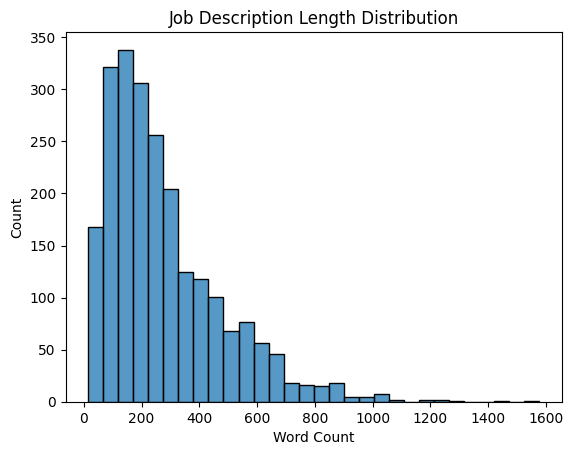

In [11]:
df['word_count'] = df['combined_text'].apply(lambda x: len(x.split()))

sns.histplot(df['word_count'], bins=30)
plt.title("Job Description Length Distribution")
plt.xlabel("Word Count")
plt.show()


### Keyword Insight

In [12]:
from collections import Counter
import re

def extract_words(text):
    return re.findall(r'\b[a-zA-Z]+\b', text.lower())

words = []
for text in df['combined_text']:
    words.extend(extract_words(text))

Counter(words).most_common(15)

[('and', 28204),
 ('to', 13428),
 ('of', 12529),
 ('the', 11231),
 ('in', 10213),
 ('experience', 9655),
 ('with', 8385),
 ('a', 7414),
 ('for', 5616),
 ('work', 4807),
 ('development', 4149),
 ('on', 4054),
 ('or', 3683),
 ('you', 3420),
 ('we', 3249)]

Initial keyword analysis showed dominance of stopwords, highlighting the need for text preprocessing such as stopword removal and normalization before feature extraction.

## Text Preprocessing

In [13]:
import re
import nltk
from nltk.corpus import stopwords

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ZABLAP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [16]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', ' ', text)
    words = [word for word in text.split() if word not in stop_words]
    return ' '.join(words)

df['clean_text'] = df['combined_text'].apply(clean_text)

I removed stopwords and normalized text using NLTK to reduce noise and improve semantic similarity in TF-IDF vectors

In [17]:
from collections import Counter

In [18]:
words = []
for text in df['clean_text']:
    words.extend(text.split())

Counter(words).most_common(15)

[('experience', 9665),
 ('work', 4808),
 ('development', 4151),
 ('knowledge', 3228),
 ('software', 3136),
 ('team', 3098),
 ('developer', 3089),
 ('design', 2883),
 ('data', 2752),
 ('years', 2740),
 ('skills', 2620),
 ('job', 2612),
 ('preferred', 2473),
 ('required', 2149),
 ('understanding', 2092)]

After preprocessing, keyword frequency analysis showed domain-relevant terms such as ‘development’, ‘software’, and ‘data’, validating the effectiveness of the NLP cleaning pipeline

## TF-IDF Vectorization + Recommendation Logic

## TF-IDF Vectorization

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2)
)

tfidf_matrix = tfidf.fit_transform(df['clean_text'])


I used TF-IDF with bi-grams to capture both individual skills and common skill phrases.

### User Input (Skills / Profile)

In [20]:
def recommend_jobs(user_input, top_n=5):
    user_input = clean_text(user_input)
    user_vec = tfidf.transform([user_input])

    from sklearn.metrics.pairwise import cosine_similarity
    similarity_scores = cosine_similarity(user_vec, tfidf_matrix)

    top_indices = similarity_scores[0].argsort()[-top_n:][::-1]
    return df.iloc[top_indices][['Job Title', 'Job Description']]


### Test Recommendation

In [21]:
user_profile = "python django backend developer with REST API experience"
recommend_jobs(user_profile)


,Job Title,Job Description
243,Django Developer,We are looking for a Python & Django Developer...
627,Django Developer,We are looking for a Python/Django Developer h...
1965,Backend Developer,Looking for backend developer with a good know...
2027,Django Developer,We are looking for Python Django developers wi...
1381,Backend Developer,"Looking for a Python / Django Intern, who have..."


Developed a content-based job recommendation engine using NLP and TF-IDF with cosine similarity to match candidate skills with relevant job roles